<a href="https://colab.research.google.com/github/ZER-0-NE/OrcaCNN-Demo/blob/master/OrcaCNN_sample_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!git clone https://github.com/axiom-data-science/OrcaCNN-data.git

Cloning into 'OrcaCNN-data'...
remote: Enumerating objects: 59, done.
remote: Counting objects: 100% (59/59), done.
remote: Compressing objects: 100% (58/58), done.
remote: Total 59 (delta 0), reused 56 (delta 0), pack-reused 0
Unpacking objects: 100% (59/59), done.


In [0]:
!git clone https://github.com/drscotthawley/panotti.git

Cloning into 'panotti'...
remote: Enumerating objects: 1193, done.
remote: Total 1193 (delta 0), reused 0 (delta 0), pack-reused 1193
Receiving objects: 100% (1193/1193), 1.39 MiB | 16.79 MiB/s, done.
Resolving deltas: 100% (773/773), done.


In [0]:

from google.colab import auth
auth.authenticate_user()

!pip install PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once in a notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

    100% |████████████████████████████████| 993kB 22.3MB/s 
  Stored in directory: /root/.cache/pip/wheels/fa/d2/9a/d3b6b506c2da98289e5d417215ce34b696db856643bad779f4
Successfully built PyDrive


In [0]:

fileId = drive.CreateFile({'id': '1j9Jwiz0GaEhGnwAzg1Arnl_sCc8fXwTX'}) #DRIVE_FILE_ID is file id example: 1iytA1n2z4go3uVCwE_vIKouTKyIDjEq
print(fileId['title'])  # folder_data.zip
fileId.GetContentFile('orca.zip')  # Save Drive file as a local file

orca_data.zip


In [0]:
!unzip orca.zip

Archive:  orca.zip
   creating: test/
  inflating: test/pos_00.wav         
  inflating: test/pos_01.wav         
  inflating: test/pos_02.wav         
  inflating: test/pos_03.wav         
  inflating: test/pos_04.wav         
  inflating: test/neg_00.wav         
  inflating: test/neg_01.wav         
  inflating: test/neg_02.wav         
  inflating: test/neg_03.wav         
  inflating: test/neg_04.wav         
   creating: training_/
  inflating: training_/neg_05.wav    
  inflating: training_/neg_06.wav    
  inflating: training_/neg_07.wav    
  inflating: training_/neg_08.wav    
  inflating: training_/neg_09.wav    
  inflating: training_/neg_10.wav    
  inflating: training_/neg_11.wav    
  inflating: training_/neg_12.wav    
  inflating: training_/neg_13.wav    
  inflating: training_/neg_14.wav    
  inflating: training_/neg_15.wav    
  inflating: training_/neg_16.wav    
  inflating: training_/neg_17.wav    
  inflating: training_/neg_18.wav    
  inflating: training_/neg

In [0]:
fileId = drive.CreateFile({'id': '1cYpcYmg8eZ5WgTtqgW-tnNaU6vdUGx0S'}) #DRIVE_FILE_ID is file id example: 1iytA1n2z4go3uVCwE_vIKouTKyIDjEq
print(fileId['title'])  # folder_data.zip
fileId.GetContentFile('training.zip')  # Save Drive file as a local file

training.zip


In [0]:
!unzip training.zip

Archive:  training.zip
   creating: training/
  inflating: training/neg_00.wav     
  inflating: training/neg_01.wav     
  inflating: training/neg_02.wav     
  inflating: training/neg_03.wav     
  inflating: training/neg_04.wav     
  inflating: training/neg_05.wav     
  inflating: training/neg_06.wav     
  inflating: training/neg_07.wav     
  inflating: training/neg_08.wav     
  inflating: training/neg_09.wav     
  inflating: training/neg_10.wav     
  inflating: training/neg_11.wav     
  inflating: training/neg_12.wav     
  inflating: training/neg_13.wav     
  inflating: training/neg_14.wav     
  inflating: training/neg_15.wav     
  inflating: training/neg_16.wav     
  inflating: training/neg_17.wav     
  inflating: training/neg_18.wav     
  inflating: training/neg_19.wav     
  inflating: training/neg_20.wav     
  inflating: training/neg_21.wav     
  inflating: training/neg_22.wav     
  inflating: training/neg_23.wav     
  inflating: training/neg_24.wav     
  in

In [0]:

import numpy as np
import wave

import matplotlib.pyplot as plt
%matplotlib inline

from glob import glob
import random

import struct

from keras.models import *
from keras.layers import *
from keras.callbacks import *

DATA_DIR = 'OrcaCNN-data/data/training'

RUN = 1

Using TensorFlow backend.


In [0]:
import os
from os.path import isdir, join
from pathlib import Path
import pandas as pd

# Math
import numpy as np
from scipy.fftpack import fft
from scipy import signal
from scipy.io import wavfile
import librosa

from sklearn.decomposition import PCA

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import IPython.display as ipd
import librosa.display

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import pandas as pd

%matplotlib inline

filename = 'OrcaCNN-data/data/training/positive/14.wav'
sample_rate, samples = wavfile.read(filename)

def log_specgram(audio, sample_rate, window_size=20,
                 step_size=10, eps=1e-10):
    nperseg = int(round(window_size * sample_rate / 1e3))
    noverlap = int(round(step_size * sample_rate / 1e3))
    freqs, times, spec = signal.spectrogram(audio,
                                    fs=sample_rate,
                                    window='hann',
                                    nperseg=nperseg,
                                    noverlap=noverlap,
                                    detrend=False)
    return freqs, times, np.log(spec.T.astype(np.float32) + eps)

freqs, times, spectrogram = log_specgram(samples, sample_rate)

fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
ax1.set_title('Raw wave of ' + filename)
ax1.set_ylabel('Amplitude')
ax1.plot(np.linspace(0, sample_rate/len(samples), sample_rate), samples)

ax2 = fig.add_subplot(212)
ax2.imshow(spectrogram.T, aspect='auto', origin='lower', 
           extent=[times.min(), times.max(), freqs.min(), freqs.max()])
ax2.set_yticks(freqs[::16])
ax2.set_xticks(times[::16])
ax2.set_title('Spectrogram of ' + filename)
ax2.set_ylabel('Freqs in Hz')
ax2.set_xlabel('Seconds')


mean = np.mean(spectrogram, axis=0)
std = np.std(spectrogram, axis=0)
spectrogram = (spectrogram - mean) / std

data = [go.Surface(z=spectrogram.T)]
layout = go.Layout(
    title='Specgtrogram of "yes" in 3d',
    scene = dict(
    yaxis = dict(title='Frequencies', range=freqs),
    xaxis = dict(title='Time', range=times),
    zaxis = dict(title='Log amplitude'),
    ),
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: DeprecationWarning:

The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning:


Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.



(67072,)


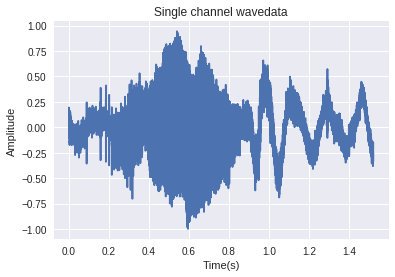

In [0]:
test_file = "OrcaCNN-data/data/training/positive/10.wav"

with wave.open(test_file, 'rb') as f:
    params = f.getparams()
    nchannels, sampwidth, framerate, nframes = params[:4]
#     print(nchannels, sampwidth, framerate, nframes) 
    strData = f.readframes(nframes)
#     print(type(strData)) # <class 'bytes'>
#     print(strData[:20]) 

waveData = np.fromstring(strData, dtype=np.int16)
# print(waveData[:20]) # [ -1 -22 -29 -17 -10 -14 -19 -18 -18 -21 -11 8]

waveData_norm = waveData * 1.0 / (max(abs(waveData)))
#     print(type(waveData_norm)) #<class 'numpy.ndarray'>
#     print(waveData_norm[:20]) 
print(waveData_norm.shape) # (67072,)

time = np.arange(0, nframes)*(1.0 / framerate)
plt.plot(time, waveData_norm)
plt.xlabel("Time(s)")
plt.ylabel("Amplitude")
plt.title("Single channel wavedata")
plt.grid('on')
plt.show()

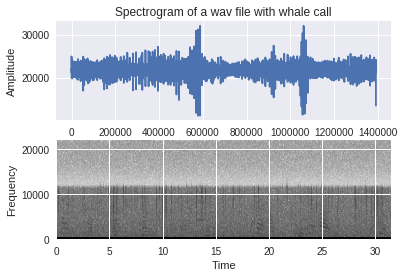

In [0]:
import matplotlib.pyplot as plot

from scipy.io import wavfile

 
# Read the wav file (mono)

samplingFrequency, signalData = wavfile.read('OrcaCNN-data/data/long_samples/long_sample_01.wav')

 

# Plot the signal read from wav file

plot.subplot(211)

plot.title('Spectrogram of a wav file with whale call')

 
plot.plot(signalData)

plot.xlabel('Sample')

plot.ylabel('Amplitude')

 

plot.subplot(212)

plot.specgram(signalData,Fs=samplingFrequency)

plot.xlabel('Time')

plot.ylabel('Frequency')

 

plot.show()

In [0]:
def get_wave_norm(file):
    with wave.open(file, 'rb') as f:
        params = f.getparams()
        nchannels, sampwidth, framerate, nframes = params[:4]
        data = f.readframes(nframes)
#         maxx = 0
#         maxx = max(nframes, maxx)
        
    data = np.fromstring(data, dtype=np.int16)
    data = data * 1.0 / max(abs(data))
    return data

def save_wave(data, file='./save.wav'):
    with wave.open(file, 'wb') as outwave:
        nchannels = 1
        sampwidth = 2
        framerate = 16000
        nframes = data.shape[0]
        comptype = "NONE"
        compname = "not compressed"
        outwave.setparams((nchannels, sampwidth, framerate, nframes, comptype, compname))
        print(data.shape)
        for v in data:
            outwave.writeframes(struct.pack('h', int(v * 64000 / 2)))

In [0]:
MAX_FRAME = 44100
LABELS = ['negative', 'positive']
N_CLASS = len(LABELS)

file_glob = []
for f in glob('training/*.wav'):
        #print(f)
        file_glob.append(f)
file_data = [get_wave_norm(f) for f in file_glob]
#print(file_data)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DeprecationWarning:

The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead



In [0]:
def add_noise(w):
    idx = random.randint(0, file_data.shape[0] - w.shape[0])
    w = w + file_data[idx:idx+w.shape[0]] / 5.0
    w = w * 1.0 / (max(abs(w)))
    return w

def get_wave(file):
    data = get_wave_norm(file)
    
#     if random.random() >= 0.5:
#         data = add_noise(data)

    wave_data = np.zeros((MAX_FRAME, ))
    wave_len = min(MAX_FRAME, data.shape[0])
    wave_data[:wave_len] = data[:wave_len]
    
    return np.expand_dims(wave_data, axis=1)

# test
# x = get_wave('{}/bed/0a7c2a8d_nohash_0.wav'.format(DATA_DIR))
# save_wave(x[:,0], 'mix.wav')

def gen(batch_size=32, verbose=False):
    while True:
        X = np.zeros((batch_size, MAX_FRAME, 1), dtype=np.float32)
        y = np.zeros((batch_size, N_CLASS), dtype=np.uint8)
        
        files = np.random.choice(file_glob, batch_size)
        if verbose:
            print(files)
            
        for i in range(batch_size):
            f = files[i]
            X[i] = get_wave(f)
            dat = "training/*.wav"
#             label = f[-6:-4]
#             print(label)
            cls = f[-10:-7]
            #print(cls)
            if cls == "pos":
              label_idx =1
            elif cls == "neg":
              label_idx =0
            #print(label_idx)
            y[i, label_idx] = 1
            
        yield X, y
def genval(batch_size=32, verbose=False):
    while True:
        X = np.zeros((batch_size, MAX_FRAME, 1), dtype=np.float32)
        y = np.zeros((batch_size, N_CLASS), dtype=np.uint8)
        
        files = np.random.choice(file_glob, batch_size)
        if verbose:
            print(files)
            
        for i in range(batch_size):
            f = files[i]
            X[i] = get_wave(f)
            dat = "test/*.wav"
#             label = f[-6:-4]
#             print(label)
            cls = f[-10:-7]
            #print(cls)
            if cls == "pos":
              label_idx =1
            elif cls == "neg":
              label_idx =0
            #print(label_idx)
            y[i, label_idx] = 1
            
        yield X, y

In [0]:
!mkdir output

In [0]:
!ls

adc.json      orca.zip	panotti      test      training_
OrcaCNN-data  output	sample_data  training  training.zip


In [0]:
from keras.preprocessing.image import ImageDataGenerator

def do_train(m):
    global RUN
    RUN += 1
    print("RUN {}".format(RUN))

    LOG_DIR = 'output'
    LOG_FILE_PATH = LOG_DIR + '/checkpoint-{epoch:02d}-{val_loss:.4f}.hdf5'
#     datagen = ImageDataGenerator(
#         rescale=1./255,
#         validation_split=0.1)

#     train_generator = datagen.flow_from_directory(
#             'OrcaCNN-data/data/training/', subset='training')

#     val_generator = datagen.flow_from_directory(
#             'OrcaCNN-data/data/training/', subset='validation')
    tensorboard = TensorBoard(log_dir=LOG_DIR, write_graph=False)
    checkpoint = ModelCheckpoint(filepath=LOG_FILE_PATH, monitor='val_loss', verbose=1, save_best_only=True)
    early_stopping = EarlyStopping(monitor='val_loss', patience=2, verbose=1)
    
    history = m.fit_generator(generator=gen(32), steps_per_epoch=256,
                                  validation_data=genval(10), validation_steps=16,
                                  epochs=5, verbose=1, callbacks=[checkpoint, early_stopping])

## CNN

In [0]:
def get_conv_model():
    m = Sequential()
    m.add(Conv1D(filters=64, kernel_size=2, strides=2, padding='valid', activation='relu', input_shape=(MAX_FRAME,1)))
    m.add(BatchNormalization())
    m.add(Conv1D(filters=64, kernel_size=2, strides=2, padding='valid', activation='relu'))
    m.add(BatchNormalization())
#     m.add(Conv1D(filters=64, kernel_size=2, strides=2, padding='valid', activation='relu'))
#     m.add(BatchNormalization())
    m.add(Flatten())
#     m.add(GlobalAveragePooling1D())
    m.add(Dropout(0.4))
    m.add(Dense(N_CLASS, activation='softmax'))
    m.compile(loss='binary_crossentropy', optimizer='adadelta', metrics=['accuracy'])
    return m

In [0]:
m = get_conv_model()
m.summary()
do_train(m)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_17 (Conv1D)           (None, 22050, 64)         192       
_________________________________________________________________
batch_normalization_17 (Batc (None, 22050, 64)         256       
_________________________________________________________________
conv1d_18 (Conv1D)           (None, 11025, 64)         8256      
_________________________________________________________________
batch_normalization_18 (Batc (None, 11025, 64)         256       
_________________________________________________________________
flatten_9 (Flatten)          (None, 705600)            0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 705600)            0         
_________________________________________________________________
dense_9 (Dense)              (None, 2)                 1411202   
Total para

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DeprecationWarning:

The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead



256/256 [==============================] - 458s 2s/step - loss: 0.7417 - acc: 0.9506 - val_loss: 0.4008 - val_acc: 0.9750

Epoch 00001: val_loss improved from inf to 0.40076, saving model to output/checkpoint-01-0.4008.hdf5
Epoch 2/5
256/256 [==============================] - 465s 2s/step - loss: 0.3522 - acc: 0.9780 - val_loss: 0.3006 - val_acc: 0.9812

Epoch 00002: val_loss improved from 0.40076 to 0.30057, saving model to output/checkpoint-02-0.3006.hdf5
Epoch 3/5
256/256 [==============================] - 452s 2s/step - loss: 0.3405 - acc: 0.9788 - val_loss: 0.6011 - val_acc: 0.9625

Epoch 00003: val_loss did not improve from 0.30057
Epoch 4/5
256/256 [==============================] - 464s 2s/step - loss: 0.3835 - acc: 0.9761 - val_loss: 0.6011 - val_acc: 0.9625

Epoch 00004: val_loss did not improve from 0.30057
Epoch 00004: early stopping


In [0]:
!cd output
from google.colab import files
files.download('output/checkpoint-03-1.5341.hdf5')

In [0]:
!ls output

checkpoint-01-0.4008.hdf5  checkpoint-02-0.3006.hdf5


## CNN + RNN(LSTM cells) [Best Model]

In [0]:
def get_cnn_rnn_model():
    ipt = Input(shape=(MAX_FRAME, 1))
    x = ipt
    x = Conv1D(filters=64, kernel_size=50, strides=50, padding='valid', activation='relu')(x)
    x = Conv1D(filters=64, kernel_size=50, strides=50, padding='valid', activation='relu')(x)
    x = BatchNormalization()(x)
    
    # LSTM
    x = LSTM(32)(x)
    
    # double
#     x = LSTM(32, return_sequences=True)(x)
#     x = LSTM(32, return_sequences=False)(x)
    
    
#     r   = LSTM(32, return_sequences=True, go_backwards=False)(x)
#     r_b = LSTM(32, return_sequences=True, go_backwards=True)(x)
#     x = concatenate([r, r_b])
#     x = Flatten()(x)

    x = Dropout(0.3)(x)
    x = Dense(N_CLASS, activation='softmax')(x)
    
    m = Model(inputs=[ipt], outputs=[x])
    m.compile(loss='binary_crossentropy', optimizer='adadelta', metrics=['accuracy'])
    
    return m

m = get_cnn_rnn_model()
m.summary()
do_train(m)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 44100, 1)          0         
_________________________________________________________________
conv1d_19 (Conv1D)           (None, 882, 64)           3264      
_________________________________________________________________
conv1d_20 (Conv1D)           (None, 17, 64)            204864    
_________________________________________________________________
batch_normalization_19 (Batc (None, 17, 64)            256       
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dropout_10 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 2)                 66        
Total para

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DeprecationWarning:

The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead



256/256 [==============================] - 468s 2s/step - loss: 0.0216 - acc: 0.9939 - val_loss: 2.2111e-04 - val_acc: 1.0000

Epoch 00001: val_loss improved from inf to 0.00022, saving model to output/checkpoint-01-0.0002.hdf5
Epoch 2/5
256/256 [==============================] - 448s 2s/step - loss: 2.3737e-04 - acc: 1.0000 - val_loss: 4.9358e-05 - val_acc: 1.0000

Epoch 00002: val_loss improved from 0.00022 to 0.00005, saving model to output/checkpoint-02-0.0000.hdf5
Epoch 3/5
256/256 [==============================] - 446s 2s/step - loss: 9.9618e-05 - acc: 1.0000 - val_loss: 2.2128e-05 - val_acc: 1.0000

Epoch 00003: val_loss improved from 0.00005 to 0.00002, saving model to output/checkpoint-03-0.0000.hdf5
Epoch 4/5
256/256 [==============================] - 443s 2s/step - loss: 6.7232e-05 - acc: 1.0000 - val_loss: 1.2859e-05 - val_acc: 1.0000

Epoch 00004: val_loss improved from 0.00002 to 0.00001, saving model to output/checkpoint-04-0.0000.hdf5
Epoch 5/5
256/256 [===============

In [0]:
from google.colab import files
files.download('output/checkpoint-03-0.0000.hdf5')

In [0]:
from __future__ import print_function
import numpy as np
import matplotlib
matplotlib.use('Agg')

from keras.models import  load_model
import matplotlib.pyplot as plt
import librosa
import os
from panotti.models import *
from panotti.datautils import *
from sklearn.metrics import roc_auc_score, roc_curve, auc
from timeit import default_timer as timer


def create(n, constructor=list):   # creates an list of empty lists
    for _ in range(n):
        yield constructor()

def count_mistakes(y_scores,Y_test,paths_test,class_names):
    n_classes = len(class_names)
    mistake_count = np.zeros(n_classes)
    mistake_log = list(create(n_classes))
    max_string_len = 0
    for i in range(Y_test.shape[0]):
        pred = decode_class(y_scores[i],class_names)
        truth = decode_class(Y_test[i],class_names)
        if (pred != truth):
            mistake_count[truth] += 1
            max_string_len = max( len(paths_test[i]), max_string_len )
            mistake_log[truth].append( paths_test[i].ljust(max_string_len)+": should be "+class_names[truth]+
                " but came out as "+class_names[pred])

    mistakes_sum = int(np.sum(mistake_count))
    print("    Found",mistakes_sum,"total mistakes out of",Y_test.shape[0],"attempts")
    print("      Mistakes by class: ")

    for i in range(n_classes):
        print("          class \'",class_names[i],"\': ",int(mistake_count[i]), sep="")
        for j in range(len(mistake_log[i])):
            print("                  ",mistake_log[i][j])
    return


def eval_network(weights_file="weights.hdf5", classpath="Preproc/Test/", batch_size=40):
    np.random.seed(1)

    # get the data
    X_test, Y_test, paths_test, class_names = build_dataset(path=classpath, batch_size=batch_size)
    print("class names = ",class_names)
    n_classes = len(class_names)

    # Load the model
    model, serial_model = setup_model(X_test, class_names, weights_file=weights_file, missing_weights_fatal=True)
    model.summary()

    num_pred = X_test.shape[0]

    print("Running predict...")
    y_scores = model.predict(X_test[0:num_pred,:,:,:],batch_size=batch_size)


    print("Counting mistakes ")
    count_mistakes(y_scores,Y_test,paths_test,class_names)

    print("Measuring ROC...")
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(Y_test[:, i], y_scores[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    auc_score = roc_auc_score(Y_test, y_scores)
    print("Global AUC = ",auc_score)

    print("\nDrawing ROC curves...")
    fig = plt.figure()
    lw = 2                      # line width
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], lw=lw, label=class_names[i]+": AUC="+'{0:.4f}'.format(roc_auc[i]))
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.draw()
    #plt.show(block=False)
    roc_filename = "roc_curves.png"
    print("Saving curves to file",roc_filename)
    plt.savefig(roc_filename)
    plt.close(fig)
    print("")

    # evaluate the model
    print("Running model.evaluate...")
    scores = model.evaluate(X_test, Y_test, verbose=1, batch_size=batch_size)
    print('Test loss:', scores[0])
    print('Test accuracy:', scores[1])
    print("All model scores:")
    print(model.metrics_names)
    print(scores)

    print("\nFinished.")
    #plt.show()
    return


if __name__ == '__main__':
    import argparse
    parser = argparse.ArgumentParser(description="evaluates network on testing dataset")
    parser.add_argument('-w', '--weights', #nargs=1, type=argparse.FileType('r'),
        help='weights file in hdf5 format', default="weights.hdf5")
    parser.add_argument('-c', '--classpath', #type=argparse.string,
        help='test dataset directory with list of classes', default="Preproc/Test/")
    parser.add_argument('--batch_size', default=40, type=int, help="Number of clips to send to GPU at once")

    args = parser.parse_args()
    eval_network(weights_file=args.weights, classpath=args.classpath, batch_size=args.batch_size)

## LSTM with  data augumentation

In [0]:
m = get_cnn_rnn_model()
m.summary()
do_train(m)